<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Accessing-census-data-using-cenpy" data-toc-modified-id="Accessing-census-data-using-cenpy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Accessing census data using cenpy</a></span><ul class="toc-item"><li><span><a href="#Lecture-objectives" data-toc-modified-id="Lecture-objectives-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lecture objectives</a></span><ul class="toc-item"><li><span><a href="#Key-Takeaways" data-toc-modified-id="Key-Takeaways-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Key Takeaways</a></span></li></ul></li></ul></li></ul></div>

# Accessing census data using cenpy

## Lecture objectives

1. Show how to access census data using `cenpy`
2. Introduce basic plotting of geographic data with `geopandas`

Rather than using the Census API, we can call it through the `cenpy` package. This is often an easier way to get the census data, at least for simple datasets.

In [2]:
import cenpy
from cenpy import products

# create a connection to the American Community Survey
acs = cenpy.products.ACS()

The [online documentation](https://cenpy-devs.github.io/cenpy/api.html#product-american-community-survey) is helpful in showing the functions that are available. We could also call `help(acs)` or just `acs?`.

The `tables` attribute  seems useful, as do the `filter_tables` and `from_county` functions.

In [3]:
# what tables are available?
acs.tables

,description,columns
table_name,,
B01001,SEX BY AGE,"[B01001_001E, B01001_002E, B01001_003E, B01001..."
B01002,MEDIAN AGE BY SEX,"[B01002_001E, B01002_002E, B01002_003E]"
B01003,TOTAL POPULATION,[B01003_001E]
B02001,RACE,"[B02001_001E, B02001_002E, B02001_003E, B02001..."
B02008,WHITE ALONE OR IN COMBINATION WITH ONE OR MORE...,[B02008_001E]
...,...,...
C27014,PUBLIC HEALTH INSURANCE BY WORK EXPERIENCE,"[C27014_001E, C27014_002E, C27014_003E, C27014..."
C27016,HEALTH INSURANCE COVERAGE STATUS BY RATIO OF I...,"[C27016_001E, C27016_002E, C27016_003E, C27016..."
C27017,PRIVATE HEALTH INSURANCE BY RATIO OF INCOME TO...,"[C27017_001E, C27017_002E, C27017_003E, C27017..."


In [4]:
# Let's map the age of the housing stock
# get all the tables that have "BUILT" in their description
acs.filter_tables('BUILT', by='description')

,description,columns
table_name,,
B25034,YEAR STRUCTURE BUILT,"[B25034_001E, B25034_002E, B25034_003E, B25034..."
B25035,MEDIAN YEAR STRUCTURE BUILT,[B25035_001E]
B25036,TENURE BY YEAR STRUCTURE BUILT,"[B25036_001E, B25036_002E, B25036_003E, B25036..."
B25037,MEDIAN YEAR STRUCTURE BUILT BY TENURE,"[B25037_001E, B25037_002E, B25037_003E]"
B25050,PLUMBING FACILITIES BY OCCUPANTS PER ROOM BY Y...,"[B25050_001E, B25050_002E, B25050_003E, B25050..."
B25107,MEDIAN VALUE BY YEAR STRUCTURE BUILT,"[B25107_001E, B25107_002E, B25107_003E, B25107..."
B25108,AGGREGATE VALUE (DOLLARS) BY YEAR STRUCTURE BUILT,"[B25108_001E, B25108_002E, B25108_003E, B25108..."
B25111,MEDIAN GROSS RENT BY YEAR STRUCTURE BUILT,"[B25111_001E, B25111_002E, B25111_003E, B25111..."
B25112,AGGREGATE GROSS RENT (DOLLARS) BY YEAR STRUCTU...,"[B25112_001E, B25112_002E, B25112_003E, B25112..."


In [ ]:
# it looks like table B25035 and variable B25035_001E are promising, Let's see what is here in Riverside County
riverside = products.ACS(2017).from_place('Riverside, CA', place_type= 'Incorporated Place', level='tract',
                                        variables='B25035_001E')

# you might get a bunch of FutureWarnings, but you can ignore these

Matched: Riverside, CA to Riverside city within layer Incorporated Places


In [6]:
# It looks like cenpy gives us a geopandas dataframe
type(riverside)

geopandas.geodataframe.GeoDataFrame

In [7]:
riverside.head()

,GEOID,geometry,B25035_001E,NAME,state,county,tract
0,06065043272,"POLYGON ((-13065671.600 3960598.630, -13065249...",1998.0,"Census Tract 432.72, Riverside County, California",06,065,043272
1,06065043228,"POLYGON ((-13049247.080 3972238.770, -13049240...",1994.0,"Census Tract 432.28, Riverside County, California",06,065,043228
2,06065049800,"POLYGON ((-13049262.000 3968743.130, -13049219...",2002.0,"Census Tract 498, Riverside County, California",06,065,049800
3,06065042724,"POLYGON ((-13041627.930 3988180.970, -13041627...",NaN,"Census Tract 427.24, Riverside County, California",06,065,042724
4,06065049600,"POLYGON ((-13043644.370 3966850.670, -13043615...",2003.0,"Census Tract 496, Riverside County, California",06,065,049600


In [8]:
# let's rename the census column to something more memorable
riverside.rename(columns={'B25035_001E':'Median year built'}, inplace=True)

In [9]:
riverside.head()

,GEOID,geometry,Median year built,NAME,state,county,tract
0,06065043272,"POLYGON ((-13065671.600 3960598.630, -13065249...",1998.0,"Census Tract 432.72, Riverside County, California",06,065,043272
1,06065043228,"POLYGON ((-13049247.080 3972238.770, -13049240...",1994.0,"Census Tract 432.28, Riverside County, California",06,065,043228
2,06065049800,"POLYGON ((-13049262.000 3968743.130, -13049219...",2002.0,"Census Tract 498, Riverside County, California",06,065,049800
3,06065042724,"POLYGON ((-13041627.930 3988180.970, -13041627...",NaN,"Census Tract 427.24, Riverside County, California",06,065,042724
4,06065049600,"POLYGON ((-13043644.370 3966850.670, -13043615...",2003.0,"Census Tract 496, Riverside County, California",06,065,049600


`GEOID` gives the standard census FIPS code, formatted as 2-digit state + 3-digit county + 6 digit tract. Read more about them [here](https://www.policymap.com/2012/08/tips-on-fips-a-quick-guide-to-geographic-place-codes-part-iii/).

`cenpy` also returns the geographic boundaries of each census tract as a polygon. This is helpful! And it means that we can plot the data pretty simply.

Here, we use the standard `geopandas` plotting function. We tell it to plot the `Median year built` column, on the `ax` object that we just created.

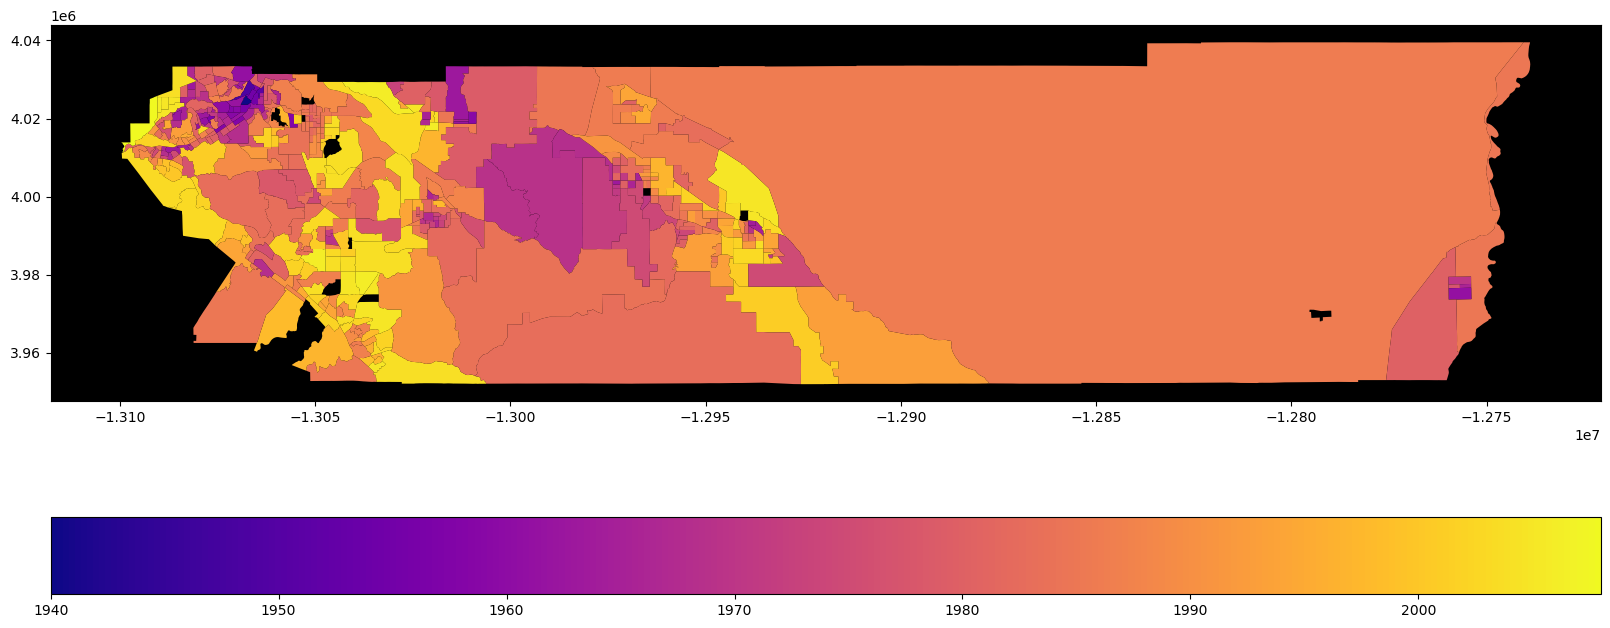

In [10]:
import matplotlib.pyplot as plt 

# create a matplotlib figure and axis object
fig, ax = plt.subplots(figsize=(20,10))

riverside.plot('Median year built', ax=ax, cmap='plasma', legend=True, 
               legend_kwds={'orientation': 'horizontal'})
ax.set_facecolor('k')

There is much that we could do to improve this map, but let's save that for another time. In general, the best course is to follow the numerous examples for `geopandas` that you'll find online.

<div class="alert alert-block alert-info">
<h3>Key Takeaways</h3>
<ul>
  <li>For simple queries, cenpy is a good alternative to the Census Bureau API.</li>
  <li>cenpy also provides a handy way to get the geographic boundaries, for easy plotting.</li>
  <li>However, cenpy only has a limited range of geographies and datasets, so for some tasks you may need to use the API.</li>
</ul>
</div>